In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [48]:
df = pd.read_csv("car_price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- car_ID : Drop
- symboling: Category
- CarName: Extract car company Name

In [49]:
df.drop(columns = ['car_ID'], inplace = True)

In [27]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
df['symboling'] = df['symboling'].astype(str)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [40]:
df['CarName'].apply(lambda x:x.split(" ")[0])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [51]:
df['car_company'] = df['CarName'].apply(lambda x:x.split(" ")[0])

In [42]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
mercury         1
vokswagen       1
Nissan          1
Name: car_company, dtype: int64

- maxda: mazda
- toyouta: toyota
- Nissan: nissan
- vokswagen, vw: volkswagen
- porcshce: porsche

In [52]:
df['car_company'].replace({'maxda':'mazda'}, inplace = True)
df['car_company'].replace({'toyouta':'toyota'}, inplace = True)
df['car_company'].replace({'Nissan':'nissan'}, inplace = True)
df['car_company'].replace({'porcshce':'porsche'}, inplace = True)
df['car_company'].replace({'vokswagen':'volkswagen', 'vw':'volkswagen'}, inplace = True)

In [53]:
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [34]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9,111,5000,21,27,13495,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9,111,5000,21,27,16500,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9,154,5000,19,26,16500,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.4,10,102,5500,24,30,13950,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.4,8,115,5500,18,22,17450,audi


In [54]:
# drop carname
df.drop(columns = ['CarName'], inplace = True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

## Data Preparation

- Dummay Variables

In [57]:
cat = df.select_dtypes(include = ['object'])

In [59]:
cat_dummies = pd.get_dummies(cat, drop_first = True)

In [60]:
df.drop(columns = list(cat.columns), inplace = True)

In [61]:
df = pd.concat([df, cat_dummies], axis = 1)

In [62]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


- Split train and test

In [64]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

- Scaling

In [69]:
num_var = list(df.select_dtypes(include = ['int64', 'float64']).columns)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var = num_var
df_train[var] = scaler.fit_transform(df_train[var])

C:\Users\SUMITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SUMITH\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
y_train = df_train.pop('price')
X_train = df_train

## Modelling

- RFE

In [72]:
X_train.shape

(143, 68)

In [73]:
# RFE

from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, 10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [74]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True])

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['enginesize', 'symboling_-2', 'enginelocation_rear', 'enginetype_rotor',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_porsche', 'car_company_saab', 'car_company_volvo'],
      dtype='object')

In [76]:
X_train_rfe = X_train[col]

In [77]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.99e-64
Time:                        07:58:29   Log-Likelihood:                -29.974
No. Observations:                 143   AIC:                             81.95
Df Residuals:                     132   BIC:                             114.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2123    

- VIF Score

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,car_company_porsche,1.56
10,car_company_volvo,1.52
3,enginelocation_rear,1.49
2,symboling_-2,1.48
1,enginesize,1.44
0,const,1.33
7,car_company_buick,1.22
6,car_company_bmw,1.10
4,enginetype_rotor,1.06
5,car_company_audi,1.02


In [84]:
X_train_rfe.drop(columns = 'enginelocation_rear', inplace = True)

- Second Model

In [85]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.7
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           9.62e-65
Time:                        08:14:03   Log-Likelihood:                -31.493
No. Observations:                 143   AIC:                             82.99
Df Residuals:                     133   BIC:                             112.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2120    

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,car_company_volvo,1.52
2,symboling_-2,1.48
1,enginesize,1.43
0,const,1.33
6,car_company_buick,1.22
5,car_company_bmw,1.10
7,car_company_porsche,1.08
3,enginetype_rotor,1.06
4,car_company_audi,1.02
8,car_company_saab,1.01


## Testing

In [87]:
df_test[var] = scaler.transform(df_test[var])

C:\Users\SUMITH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SUMITH\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [88]:
y_test = df_test.pop('price')
X_test = df_test

In [92]:
retain = list(X_train_rfe.columns[1:])

In [93]:
X_test_rfe = X_test[retain]

In [94]:
X_test_rfe.head()

,enginesize,symboling_-2,enginetype_rotor,car_company_audi,car_company_bmw,car_company_buick,car_company_porsche,car_company_saab,car_company_volvo
160,-0.660242,0,0,0,0,0,0,0,0
186,-0.390836,0,0,0,0,0,0,0,0
59,-0.072447,0,0,0,0,0,0,0,0
165,-0.660242,0,0,0,0,0,0,0,0
140,-0.415328,0,0,0,0,0,0,0,0


In [95]:
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.columns

Index(['const', 'enginesize', 'symboling_-2', 'enginetype_rotor',
       'car_company_audi', 'car_company_bmw', 'car_company_buick',
       'car_company_porsche', 'car_company_saab', 'car_company_volvo'],
      dtype='object')

In [96]:
y_pred = lm1.predict(X_test_rfe)

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8876986531759444

Text(0, 0.5, 'y_pred')

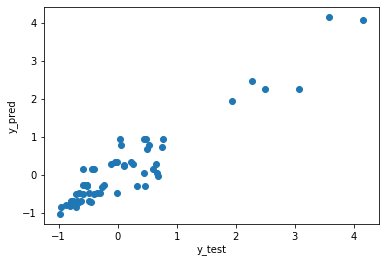

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

- Residual Analysis

In [100]:
y_train_pred = lm1.predict(X_train_rfe)

C:\Users\SUMITH\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


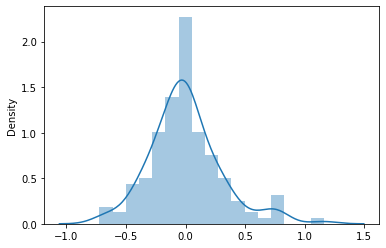

In [101]:
sns.distplot((y_train-y_train_pred))